# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1 : La loi forte des grands nombres nous permet d'estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles.

2 : On note $X$ le vecteur gaussien correspondant aux points de discrétisation sans observation, et $Y$ le vecteur gaussien correspondant aux points observés.

\mathbf{P}_(Z   = \frac{1}{(2\pi)^\frac{k}{2} \sqrt{det(CS_Y)}}$

3 : $Y$ est centrée réduite donc le vecteur $Z$ suit une loi normale d'espérance $m$ et de matrice de covariance $RR^{t}$ d'après le cours (simulation d'un vecteur gaussien).

4 : Pour simuler un vecteur gaussien $Z = (z_1, ... , z_k)$ d'espérance $0$ et de matrice de covariance l'identité, on peut utiliser la méthode de Box-Muller pour simuler $n$ variables aléatoires gaussiennes centrées, réduites et indépendantes qui forment les $z_i$. Puis on utilise la relation ci-dessus pour nous ramener à un vecteur ayant l'espérance et la matrice de covariance que l'on souhaite.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
def cov(dist,a,sigma2):
    return sigma2 * np.exp(-dist/a)

2. Calculer la matrice de distance.

In [3]:
def distance(x):
    return abs(discretization[x[0]]-discretization[x[1]])

Matrice_Dist = [[distance((i,j)) for i in range(N)] for j in range(N)]

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Matrice_covariance = [[cov(distance((i,j)),a,sigma2) for i in range(N)] for j in range(N)]

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
n = len(observation_indexes)
C_observations = np.zeros((n, n)) #matrice de covariance entre les observations
C_obs_unknown = np.zeros((n, N-n))#matrice de covariance entre les observations et les inconnues
C_unknown = np.zeros((N-n, N-n)) #matrice de covariance des inconnues

for i, e in enumerate(observation_indexes):
    for j, f in enumerate(observation_indexes):
        C_observations[i][j] = Matrice_covariance[e][f]

for i, e in enumerate(observation_indexes):
    for j, f in enumerate(unknown_indexes):
        C_obs_unknown[i][j] = Matrice_covariance[e][f]

for i, e in enumerate(unknown_indexes):
    for j, f in enumerate(unknown_indexes):
        C_unknown[i][j] = Matrice_covariance[e][f]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

espérance conditionnelle de Z sachant $Y=(z_1,..., z_{n})$ d'après le poly proba IV: 
$m_{Z|Y=y}=\psi(y) = m_z + C_{Z,Y}C^{-1}_Y(y-m_Y)$



In [20]:
m_z=-5*np.ones(N-n)
m_y=-5*np.ones(n)
y=np.random.multivariate_normal(m_y, C_observations) 
#le problème c'est que l'espérance conditionnelle est une fonction de y... que doit-on répondre??
#he en fait on nous donne un y, c'est le tableau depth. my bad.
m = m_z + np.dot(np.transpose(C_obs_unknown), np.dot(np.linalg.inv(C_observations), depth-m_y))
print(m)

[ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.75833267  -5.99477703
  -6.2411774

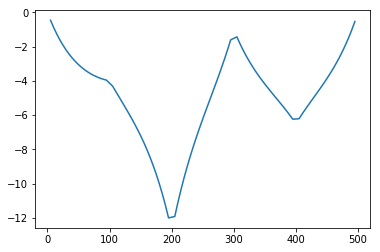

In [21]:
def esperance_conditionelle(y):
    return m_z - np.dot(np.transpose(C_obs_unknown), np.dot(np.linalg.inv(C_observations), y-m_y))

Y=[discretization[i] for i in unknown_indexes]
M=[m[i] for i in range(N-n)]
plt.plot(Y, M)
plt.show()

#c'est très le rigolo

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

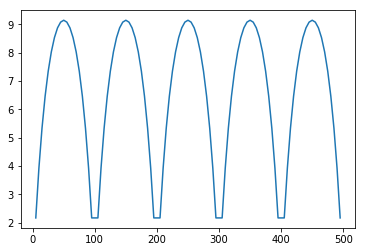

In [11]:
Cov_conditionnelle = C_unknown - np.dot(np.transpose(C_obs_unknown), np.dot(np.linalg.inv(C_observations), C_obs_unknown))
position = [discretization[i] for i in unknown_indexes]
diagonale = [Cov_conditionnelle[i][i] for i in range(N-n)]
plt.plot(position, diagonale)
plt.show()

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

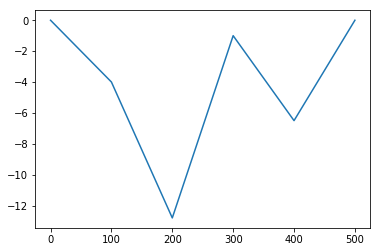

In [13]:
#simulons la variable conditionnelle. On utilise l'algorithme décrit à la question théorique 4
#pour cela nous avons besoin de trouver la décomposition de Cholesky de la matrice de covariance conditionnelle
#on pourrait coder l'algo de décomposition nous-mêmes. mais j'ai trouvé un module qui le fait, 
#et comme ma réponse à cette question me semble déjà un peu douteuse (avec numpy on simule une gaussienne comme
#on veut, pourquoi s'embêter à passer par une gaussienne centrée réduite ??)
#j'ai installé un module avec pip (pip install matrix-decomposition)

# echec de import matrix-decomposition
profondeur = np.linspace(0, -30, 100)
def simulation_conditionnelle(nb):
    s = np.zeros(N-n)
    for i in range(nb):
        y = np.random.normal(size=(N-n))
        #s+=(m_z + np.dot(L, y))
        s+=np.random.multivariate_normal(m, Cov_conditionnelle)
    return s/nb

x = [discretization[i] for i in unknown_indexes]
y = simulation_conditionnelle(100)
t = [discretization[i] for i in observation_indexes]
#plt.plot(x, y) #simulation en bleu
#plt.plot(x, m) #espéreance en orange
plt.plot(t, depth) #WTF ???
plt.show()




8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [ ]:
def longueur_totale(profondeur, pas):
    s = 0
    for i in range(0, len(profondeur)-1, 2):
        s += (pas**2 + (profondeur[i]-profondeur[i+1])**2)**(1/2)
    return s

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [ ]:
def longueur_cable(nb):
    profondeur = np.zeros(N)
    for i, j in enumerate(observation_indexes):
        profondeur[j] = depth[i]
    s = 0
    for i in range(nb):
        y = np.random.multivariate_normal(m, Cov_conditionnelle)
        for i, j in enumerate(unknown_indexes):
            profondeur[j] = y[i]
        s += longueur_totale(profondeur, Delta)
    return s/nb
print('avec 100 simulations, on trouve une longueur de ', longueur_cable(100), 'm')
#longueur de l'espérance conditionnelle
profondeur = np.zeros(N)
for i, j in enumerate(observation_indexes):
    profondeur[j] = depth[i]
for i, j in enumerate(unknown_indexes):
        profondeur[j] = m[i]
print("la longueur de l'espérance conditionnelle est ", longueur_totale(profondeur, Delta), 'm')

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

In [ ]:
M = [longueur_cable(i) for i in range(1, 201)]
x = np.arange(1, 201)
plt.plot(x, M)
plt.show()

11. Représenter l'histogramme des longueurs de câbles générées.

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.